In [ ]:
### Running in Google Colab? You'll want to uncomment and run these cell once each time you start this notebook.

"""
!wget https://raw.githubusercontent.com/psheehan/CIERA-HS-Program/master/BonusProblems/Module2/HRstars.csv
"""

*Modified from the CIERA IDEAS program python notes (https://github.com/IDEASpy/IDEASpy) and from notes by G. Besla, P. Pinto, E. Hayati (https://github.com/gurtina/P105A_2019)* 

## Hertzsprung-Russell Diagram

In this activity, you are going to make one of the most important tools in Astronomy, a Hertzprung-Russell (H-R) Diagram. H-R Diagrams plot the temperature of a star against how bright a star is (i.e. it's "luminosity"). They are tremendously useful for studying many aspects of stars because, as it turns out, different types of stars fall in specific places on an H-R Diagram.

The file "HRstars.csv" contains the temperature (in Kelvin; first column) and the luminosity (in solar luminosity; second column) of a set of stars. Use numpy loadtxt to read the data file and extract the appropriate data as separate variables. 

In [3]:
##Import Modules
import numpy as np

##Read data from file. Use delimiter = ','
data = np.loadtxt('HRstars.csv', delimiter=',')  ##fill in the blank

temperature = data[:,0]
luminosity = data[:,1]


Now that you've loaded the data, make a plot showing temperature vs. luminosity for the stars in this dataset. Make sure to label your axes properly!

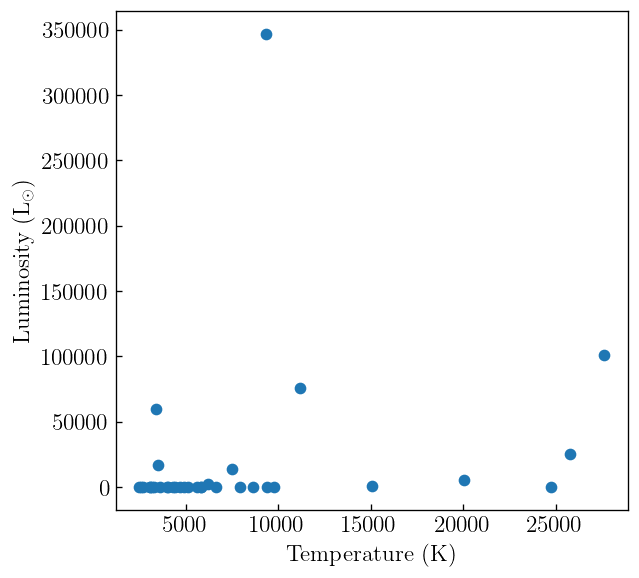

In [9]:
##Import Modules
import matplotlib.pyplot as plt

##Plot the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5,5.5), dpi=120)

ax.scatter(temperature, luminosity)

##Make title and x, y labels. 
##X label: Temperature (K), Y label: Luminosity (Lsun)
##Title: HR Diagram

ax.set_xlabel("Temperature (K)", fontsize=14)
ax.set_ylabel("Luminosity (L$_{\odot}$)", fontsize=14)

ax.tick_params("both", labelsize=14)

Now, we're going to make some adjustments to your plot. H-R diagrams are traditionally plotted with temperature increasing from right to left. Also, you might notice that a lot of the data points are crowded around zero. This is because the luminosities and temperatures of stars span many "orders of magnitude" (i.e. factors of 10). One way to nicely deal with this is to change the axes to a log scale. Make a new version of your above plot, but now reverse the x-axis and make both axes have a logarithmic scale:

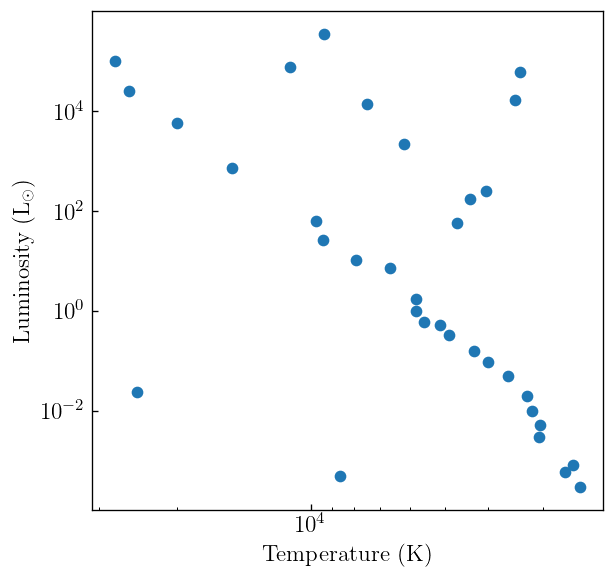

In [8]:
##Plot the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5,5.5), dpi=120)

ax.scatter(temperature, luminosity)

##Make title and x, y labels. 
##X label: Temperature (K), Y label: Luminosity (Lsun)
##Title: HR Diagram

ax.set_xlabel("Temperature (K)", fontsize=14)
ax.set_ylabel("Luminosity (L$_{\odot}$)", fontsize=14)

ax.tick_params("both", labelsize=14)

ax.set_xscale('log')
ax.set_yscale('log')

ax.invert_xaxis()

Now lets add some color! Hotter stars are bluer and colder stars are redder, so lets use a color map called 'RdYlBu' for the colors of the points. (_Hint_: The ax.scatter function allows you to change the colors of the points based on an array of input values. If the color map goes from red at small values to blue at large values, what array should we give the scatter function to map colors properly?)

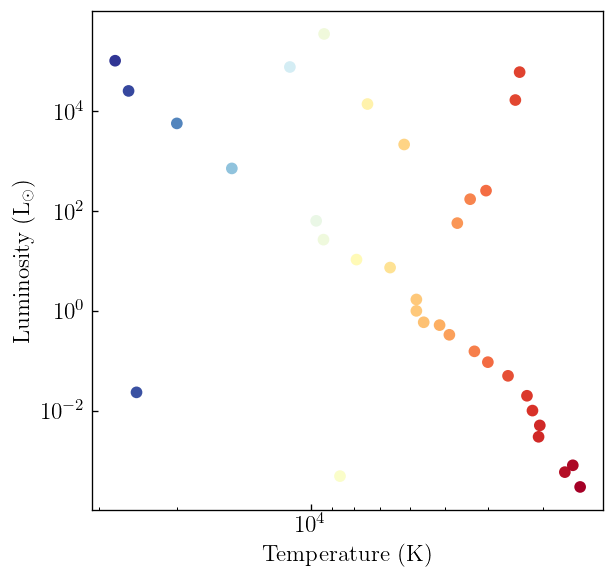

In [13]:
cm = plt.cm.get_cmap('RdYlBu')  ##This is the color map for the stars

##Plot the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5,5.5), dpi=120)

ax.scatter(temperature, luminosity, c=np.log10(temperature), cmap=cm)

##Make title and x, y labels. 
##X label: Temperature (K), Y label: Luminosity (Lsun)
##Title: HR Diagram

ax.set_xlabel("Temperature (K)", fontsize=14)
ax.set_ylabel("Luminosity (L$_{\odot}$)", fontsize=14)

ax.tick_params("both", labelsize=14)

ax.set_xscale('log')
ax.set_yscale('log')

ax.invert_xaxis()

Finally, the size of a star depends on two properties, it's temperature and size. Hotter stars are brighter, but it also turns out bigger stars are brighter because they have more surface area to emit light from. Let's incorporate information about the size of stars in our plot. Use this equation 

\begin{equation} 
\frac{L}{L_{\odot}}=(\frac{R}{R_{\odot}})^2(\frac{T}{T_{\odot}})^4 
\end{equation} 

with

\begin{equation} T_{\odot} = 5780 K \end{equation}

to approximate the sizes of the points representing the stars. (_Hint_: The scatter function also allows you to specify the size of points based on an array of input values.)

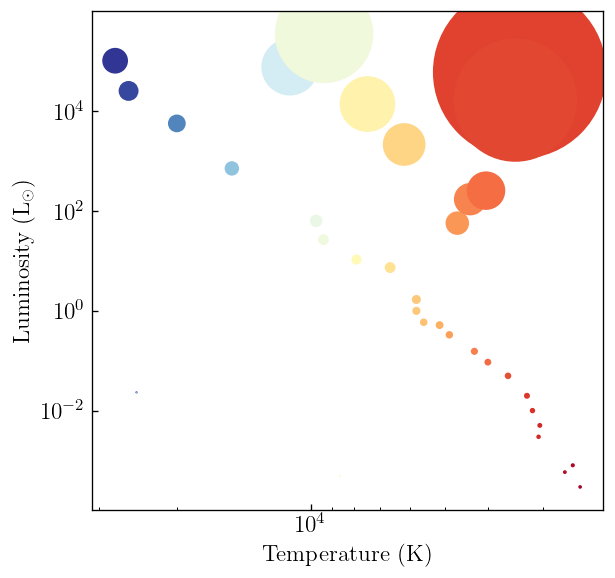

In [17]:
##Approximate the sizes of the stars with the equation above and multiply them by 15.
Tsun=5780.

Rstar = np.sqrt(luminosity * (temperature / Tsun)**-4)

sstar=15*Rstar   ##Fill in the blank

cm = plt.cm.get_cmap('RdYlBu')  ##This is the color map for the stars

##Plot the data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5,5.5), dpi=120)

ax.scatter(temperature, luminosity, c=np.log10(temperature), cmap=cm, s=sstar)

##Make title and x, y labels. 
##X label: Temperature (K), Y label: Luminosity (Lsun)
##Title: HR Diagram

ax.set_xlabel("Temperature (K)", fontsize=14)
ax.set_ylabel("Luminosity (L$_{\odot}$)", fontsize=14)

ax.tick_params("both", labelsize=14)

ax.set_xscale('log')
ax.set_yscale('log')

ax.invert_xaxis()

What do you notice about the stars in your H-R Diagram? The features you see in this diagram correspond to different types of stars, as you can see in the H-R Diagram shown below (_Note_: Double click on this cell to edit and remove the "\<!--" and "\-->" below to see the image). Each of these different types of stars correspond to interesting physics that happens at different points in the lifetime of stars. The "main sequence" is where stars live during the vast majority of their life, while they are fusing Hydrogen as a source of fuel. "Giant" stars are what you get when stars near the end of their lives. Though the exact physics is too complicated for this simple notebook (though do feel free to ask an instructor, if interested!), in short, stars near the end of their lives start burning a huge amount of fuel in a short amount of time, causing them to swell up and get very large and bright. But because they are so large, their surfaces also cool down some. Finally, white dwarfs are what is left over when a giant star can no longer hold on to most of this material at large radii when the star is swollen, and so is left with a super hot core. But because they are small (about the size of Earth!), they aren't very bright.

<!--
<img src="eso0728c.jpg">
-->